Customer Behaviour Prediction

In [4]:
# this is to view the notebook in full with on my screen

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# inport libraries:
  
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import copy

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn .model_selection import train_test_split
from sklearn .linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn .naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

#from sklearn import metrics

from sklearn.metrics import roc_curve , auc
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format  = 'retina'

In [6]:
data=pd.read_csv("marketing_campaign.csv",sep=";")


In [13]:
data.head()

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,ZCostContact,ZRevenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


EDA

In [8]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Education average.
unique_Education = pd.unique(data.Education)

# find Income averages in Education specific
# Equalize the average Income values to the missing values in Income specific to Education
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ['Income'] # it can be add more column
for c in unique_Education:
    
    # create Education filter
    Education_filtre = temp_data.Education == c
    # filter data by Education
    filtered_data = temp_data[Education_filtre]
    
    # find average for Income in specific to Education
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Education
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Education:{c}")
        else: # find average for all data if no average in specific to Education
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in Income to data temporary            
    temp_data[Education_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in Income column fill with 52720.37 when Education:Graduation
Missing Value in Income column fill with 56145.31 when Education:PhD
Missing Value in Income column fill with 52917.53 when Education:Master
Missing Value in Income column fill with 20306.26 when Education:Basic
Missing Value in Income column fill with 47633.19 when Education:2n Cycle


/tmp/ipykernel_4856/314526681.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[s] = filtered_data[s].fillna(mean)


In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
# rename the columns
data.rename(columns = {'Year_Birth': 'YearBirth',
                       'Marital_Status': 'MaritalStatus', 
                       'Dt_Customer': 'DtCustomer', 
                       'Z_CostContact': 'ZCostContact',
                       'Z_Revenue': 'ZRevenue', 
                       'Kidhome': 'KidHome',
                       'Teenhome': 'TeenHome'}, inplace = True)

In [27]:
# Adding three new columns of year month and day
data["dtc_Year"] = pd.to_datetime(data["DtCustomer"]).dt.year
data["dtc_month"] = pd.to_datetime(data["DtCustomer"]).dt.month_name()
data["dtc_day"] = pd.to_datetime(data["DtCustomer"]).dt.day
recent = data[data["dtc_Year"] == 2012]

In [23]:
recent.head()

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,ZCostContact,ZRevenue,Response,dtc_Year,dtc_month,dtc_day
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,March,8
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,February,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,January,19
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,0,0,3,11,0,2014,March,13
23,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,3,11,0,2014,January,11


<AxesSubplot:>

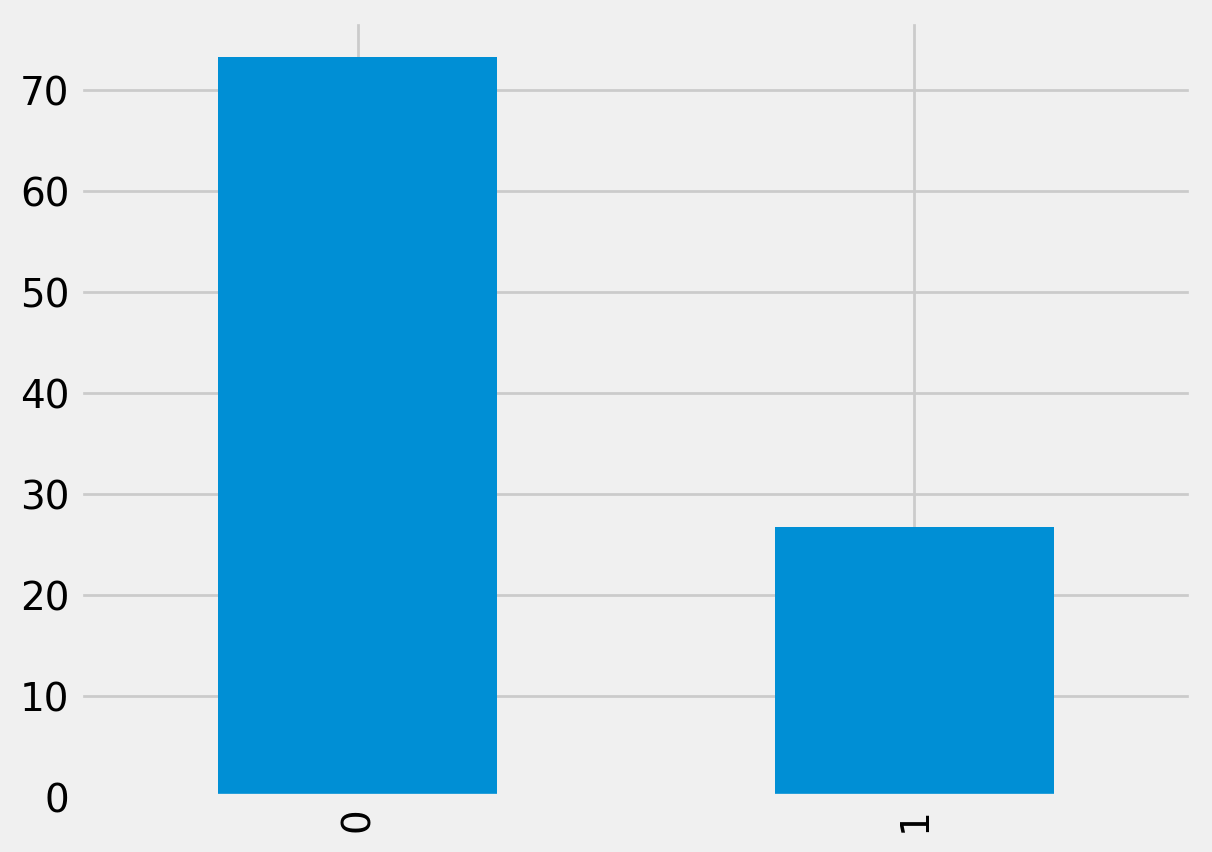

In [28]:
(recent['Response'].value_counts(normalize=True)*100).plot(kind='bar')

In [1]:
df_clean = copy.deepcopy(data)

df_clean.loc[:,['KidHome', 'TeenHome', ]] = df_clean.loc[:,['KidHome', 'TeenHome','MaritalStatus' ]].apply(LabelEncoder().fit_transform) 

NameError: name 'copy' is not defined

In [ ]:


# check null data
df_clean.isnull().sum()


In [10]:
df = df_clean.drop(["MntWines",'Income','Education','DtCustomer' ,"MntFruits","MntMeatProducts",'MntFishProducts','MntSweetProducts','MaritalStatus','MntGoldProds', 'Complain','ZCostContact','ZRevenue'], axis=1)


In [11]:
df.head()


,ID,YearBirth,KidHome,TeenHome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,0,0,58,3,8,10,4,7,0,0,0,0,0,1
1,2174,1954,1,1,38,2,1,1,2,5,0,0,0,0,0,0
2,4141,1965,0,0,26,1,8,2,10,4,0,0,0,0,0,0
3,6182,1984,1,0,26,2,2,0,4,6,0,0,0,0,0,0
4,5324,1981,1,0,94,5,5,3,6,5,0,0,0,0,0,0


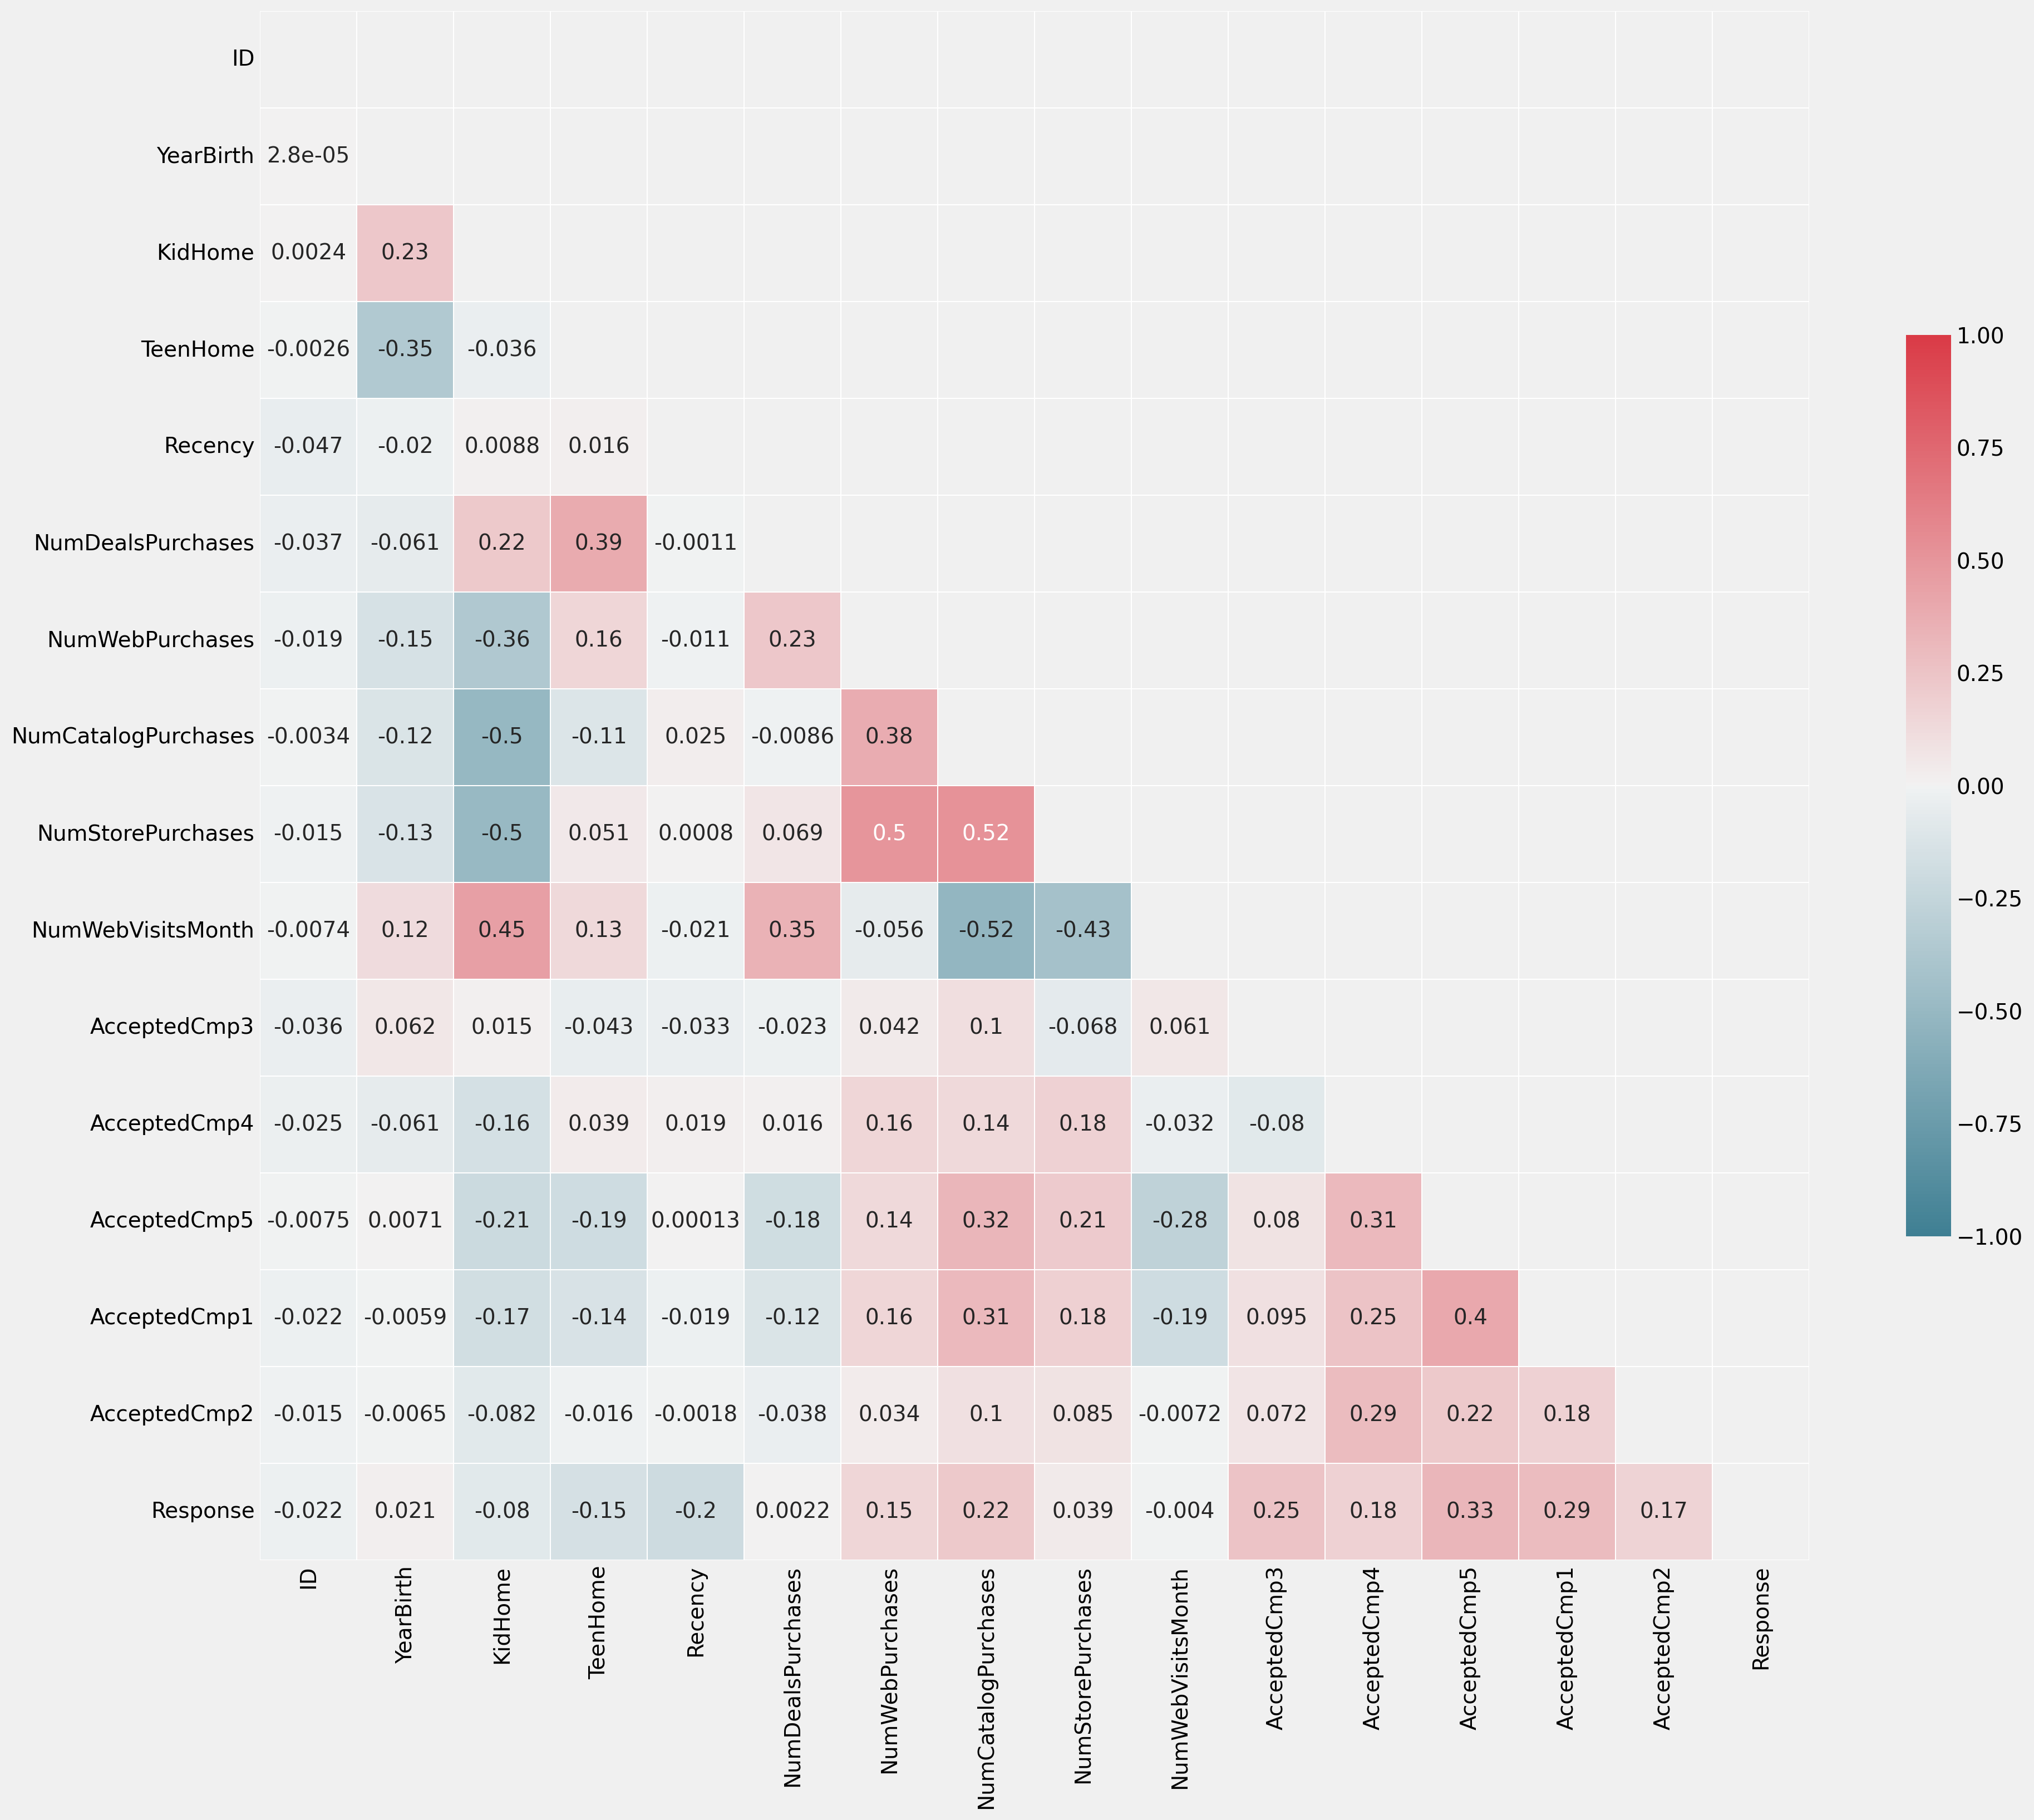

In [12]:
df_corr = df.corr()
sns.set
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] =True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask,cmap=cmap, vmax=1, center=0,vmin = -1,  square=True, linewidths=.05, cbar_kws={'shrink':.5}, annot= 
           True);

In [13]:
df.corr()

,ID,YearBirth,KidHome,TeenHome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,1.000000,0.000028,0.002406,-0.002580,-0.046524,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968
YearBirth,0.000028,1.000000,0.230176,-0.352111,-0.019871,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,0.021325
KidHome,0.002406,0.230176,1.000000,-0.036133,0.008827,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008
TeenHome,-0.002580,-0.352111,-0.036133,1.000000,0.016198,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446
Recency,-0.046524,-0.019871,0.008827,0.016198,1.000000,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437
NumDealsPurchases,-0.037166,-0.060846,0.221798,0.387741,-0.001098,1.000000,0.234185,-0.008617,0.068879,0.347633,-0.023109,0.015594,-0.183248,-0.123244,-0.037695,0.002238
NumWebPurchases,-0.018924,-0.145040,-0.361647,0.155500,-0.010726,0.234185,1.000000,0.378376,0.502713,-0.055846,0.042176,0.155903,0.138684,0.155143,0.034188,0.148730
NumCatalogPurchases,-0.003440,-0.121275,-0.502237,-0.110769,0.025110,-0.008617,0.378376,1.000000,0.518738,-0.520364,0.104730,0.139247,0.322321,0.308097,0.099852,0.220810
NumStorePurchases,-0.014927,-0.128272,-0.499683,0.050695,0.000799,0.068879,0.502713,0.518738,1.000000,-0.428473,-0.067577,0.179379,0.214790,0.183249,0.085189,0.039363
NumWebVisitsMonth,-0.007446,0.121139,0.447846,0.134884,-0.021445,0.347633,-0.055846,-0.520364,-0.428473,1.000000,0.061211,-0.032126,-0.278113,-0.192502,-0.007196,-0.003987


In [14]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

ID: 2240
YearBirth: 59
KidHome: 3
TeenHome: 3
Recency: 100
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Response: 2


logistic regression

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   YearBirth            2240 non-null   int64
 2   KidHome              2240 non-null   int64
 3   TeenHome             2240 non-null   int64
 4   Recency              2240 non-null   int64
 5   NumDealsPurchases    2240 non-null   int64
 6   NumWebPurchases      2240 non-null   int64
 7   NumCatalogPurchases  2240 non-null   int64
 8   NumStorePurchases    2240 non-null   int64
 9   NumWebVisitsMonth    2240 non-null   int64
 10  AcceptedCmp3         2240 non-null   int64
 11  AcceptedCmp4         2240 non-null   int64
 12  AcceptedCmp5         2240 non-null   int64
 13  AcceptedCmp1         2240 non-null   int64
 14  AcceptedCmp2         2240 non-null   int64
 15  Response             2240 non-null   int64
dtypes: int64(16)
memory usag

In [16]:
X = df.drop(['Response'], axis=1)

y = df['Response']

In [17]:

X.head()

,ID,YearBirth,KidHome,TeenHome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,5524,1957,0,0,58,3,8,10,4,7,0,0,0,0,0
1,2174,1954,1,1,38,2,1,1,2,5,0,0,0,0,0
2,4141,1965,0,0,26,1,8,2,10,4,0,0,0,0,0
3,6182,1984,1,0,26,2,2,0,4,6,0,0,0,0,0
4,5324,1981,1,0,94,5,5,3,6,5,0,0,0,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn import preprocessing

categorical = [ 'Education', 'Maritalstatus']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [19]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [20]:
# Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LogisticRegression(solver= 'liblinear') # create a model for Linear Regression
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 =fit.score(X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) ) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = NumWebPurchases, ID, AcceptedCmp3, Recency, AcceptedCmp5, NumWebVisitsMonth, KidHome, AcceptedCmp4, NumStorePurchases, NumCatalogPurchases, AcceptedCmp1, TeenHome, NumDealsPurchases, AcceptedCmp2, YearBirth
(Step) Trying NumWebPurchases...
(Step) - Features = NumWebPurchases
(Step) - Adjusted R^2: This = 0.859; Best = 0.000
(Step) - New Best!   : Feature = NumWebPurchases; R^2 = 0.859; Adjusted R^2 = 0.859
(Step) Trying ID...
(Step) - Features = ID
(Step) - Adjusted R^2: This = 0.861; Best = 0.859
(Step) - New Best!   : Feature = ID; R^2 = 0.861; Adjusted R^2 = 0.861
(Step) Trying AcceptedCmp3...
(Step) - Features = AcceptedCmp3
(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying Recency...
(Step) - Features = Recency
(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying AcceptedCmp5...
(Step) - Features = AcceptedCmp5
(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying NumWebVisitsMonth...
(Step) - Features = NumWebVisitsMonth
(Step

In [21]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

Logistic Regression Model heatmap and report:------------------------------------------------------
Accuracy is:  0.8645833333333334
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       556
           1       0.74      0.34      0.46       116

    accuracy                           0.86       672
   macro avg       0.81      0.66      0.69       672
weighted avg       0.85      0.86      0.84       672



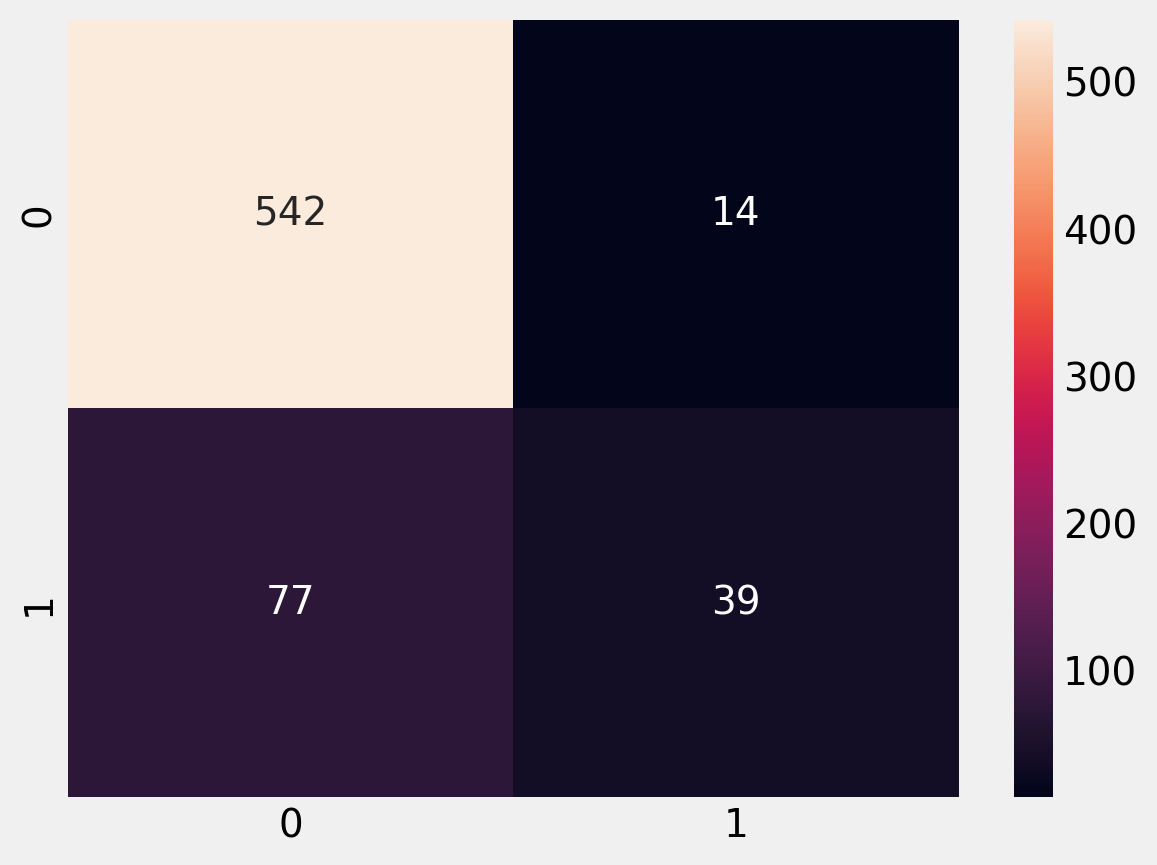

In [22]:
#Target
target_col = 'Response'
feature_cols = 'AcceptedCmp1', 'AcceptedCmp5', 'Recency', 'AcceptedCmp3'                           # [c for c in X.columns if c != target_col]



lin_model = LogisticRegression(solver= 'liblinear', C=100 )
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

y_pred = lin_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Logistic Regression Model heatmap and report:------------------------------------------------------')
# <br>

print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt= 'd');
print(classification_report(y_test, y_pred));


39 true positives, 14 false positives, 77 false negatives, 542 true negatives

In [23]:
### 4. Support Vector Machine


SVC Model heatmap and report:------------------------------------------------------
Accuracy is:  0.8511904761904762
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       556
           1       0.77      0.20      0.32       116

    accuracy                           0.85       672
   macro avg       0.81      0.59      0.62       672
weighted avg       0.84      0.85      0.81       672

SVC does worse on TN and FP by 1


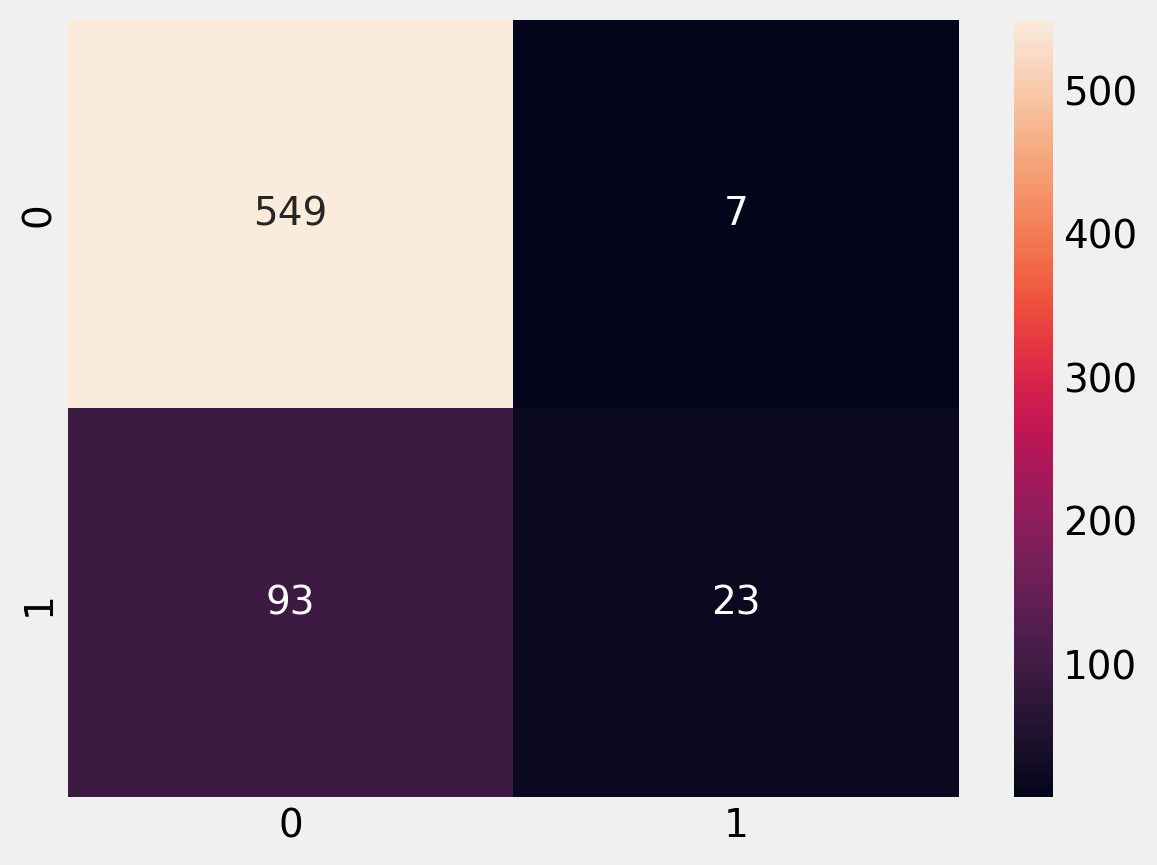

In [24]:
#Target


target_col = 'Response'
feature_cols = [c for c in X.columns if c != target_col]



svc_model = SVC(kernel= 'linear', probability= True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('SVC Model heatmap and report:------------------------------------------------------')

print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt= 'd');
print(classification_report(y_test, y_pred));
print('SVC does worse on TN and FP by 1')

23 true positives, 7 false positives, 93 false negatives, 549 true negatives

 Naive Bayes


Gausiann NB Model heatmap and report:------------------------------------------------------
Accuracy is:  0.8363095238095238
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       556
           1       0.52      0.60      0.56       116

    accuracy                           0.84       672
   macro avg       0.72      0.74      0.73       672
weighted avg       0.85      0.84      0.84       672

Gaussian NB does same as SVC


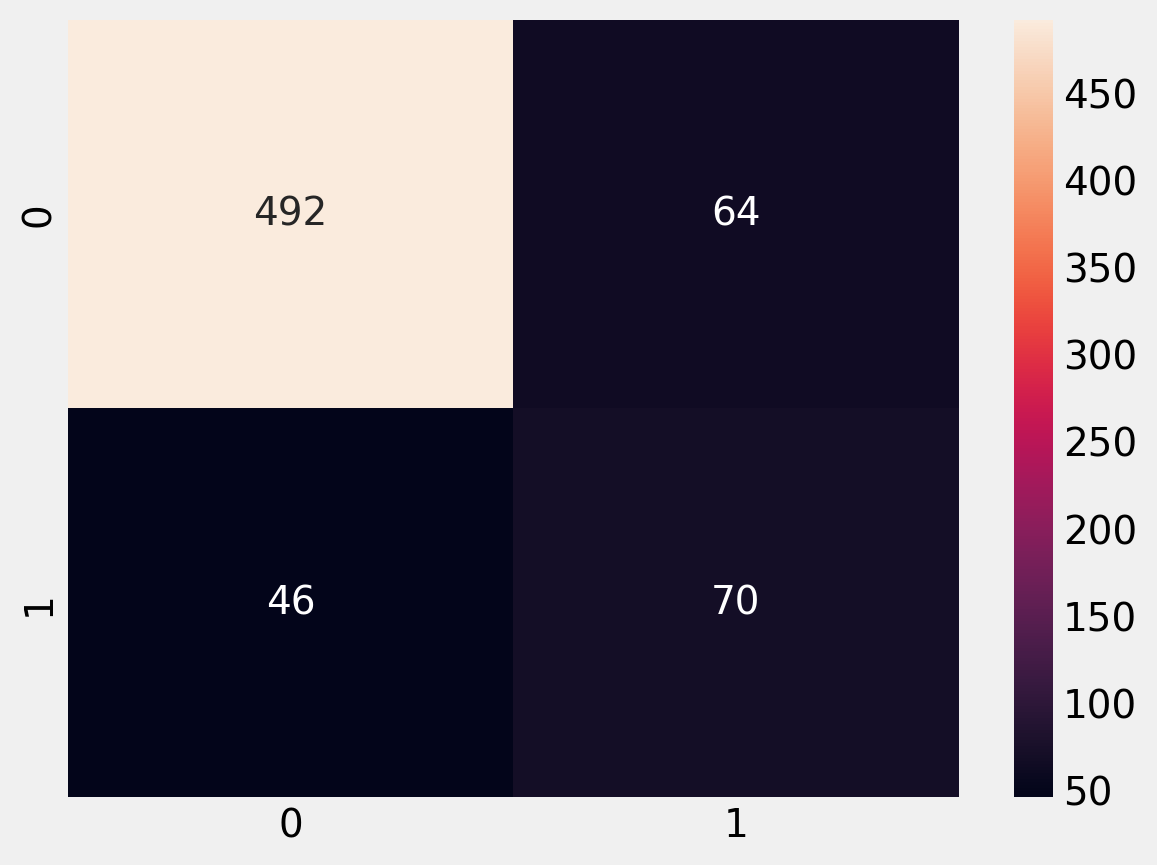

In [25]:
target_col = 'Response'
feature_cols = [c for c in X.columns if c != target_col]



model = GaussianNB()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Gausiann NB Model heatmap and report:------------------------------------------------------')

print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt= 'd');
print(classification_report(y_test, y_pred));
print('Gaussian NB does same as SVC')

70 true positives, 64 false positives, 46 false negatives, 492 true negatives

 Find Best Estimator For Logistic Regression 

In [26]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv= 5, verbose= 3)
lr_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.848 total time=   0.1s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.859 total time=   0.1s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.855 total time=   0.0s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[CV 4/5] END ...................C=1, penalty=l2;, score=0.850 total time=   0.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.866 total time=   0.0s
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.853 total time=   0.1s
[CV 2/5] END ..................C=10, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.842 total time=   0.1s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[CV 4/5] END ..................C=10, penalty=l2;, score=0.850 total time=   0.1s
[CV 5/5] END ..................C=10, penalty=l2;, score=0.866 total time=   0.1s
[CV 1/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=100, penalty=l2;, score=0.850 total time=   0.0s
[CV 2/5] END .................C=100, penalty=l2;, score=0.864 total time=   0.1s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[CV 3/5] END .................C=100, penalty=l2;, score=0.857 total time=   0.1s
[CV 4/5] END .................C=100, penalty=l2;, score=0.848 total time=   0.0s
[CV 5/5] END .................C=100, penalty=l2;, score=0.871 total time=   0.1s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------------------------

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=3)

Find Best Estimator For SVM


In [27]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability = True), svc_params, cv= 5 , verbose=1)
svc_gs.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [28]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.8580357142857142


Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot


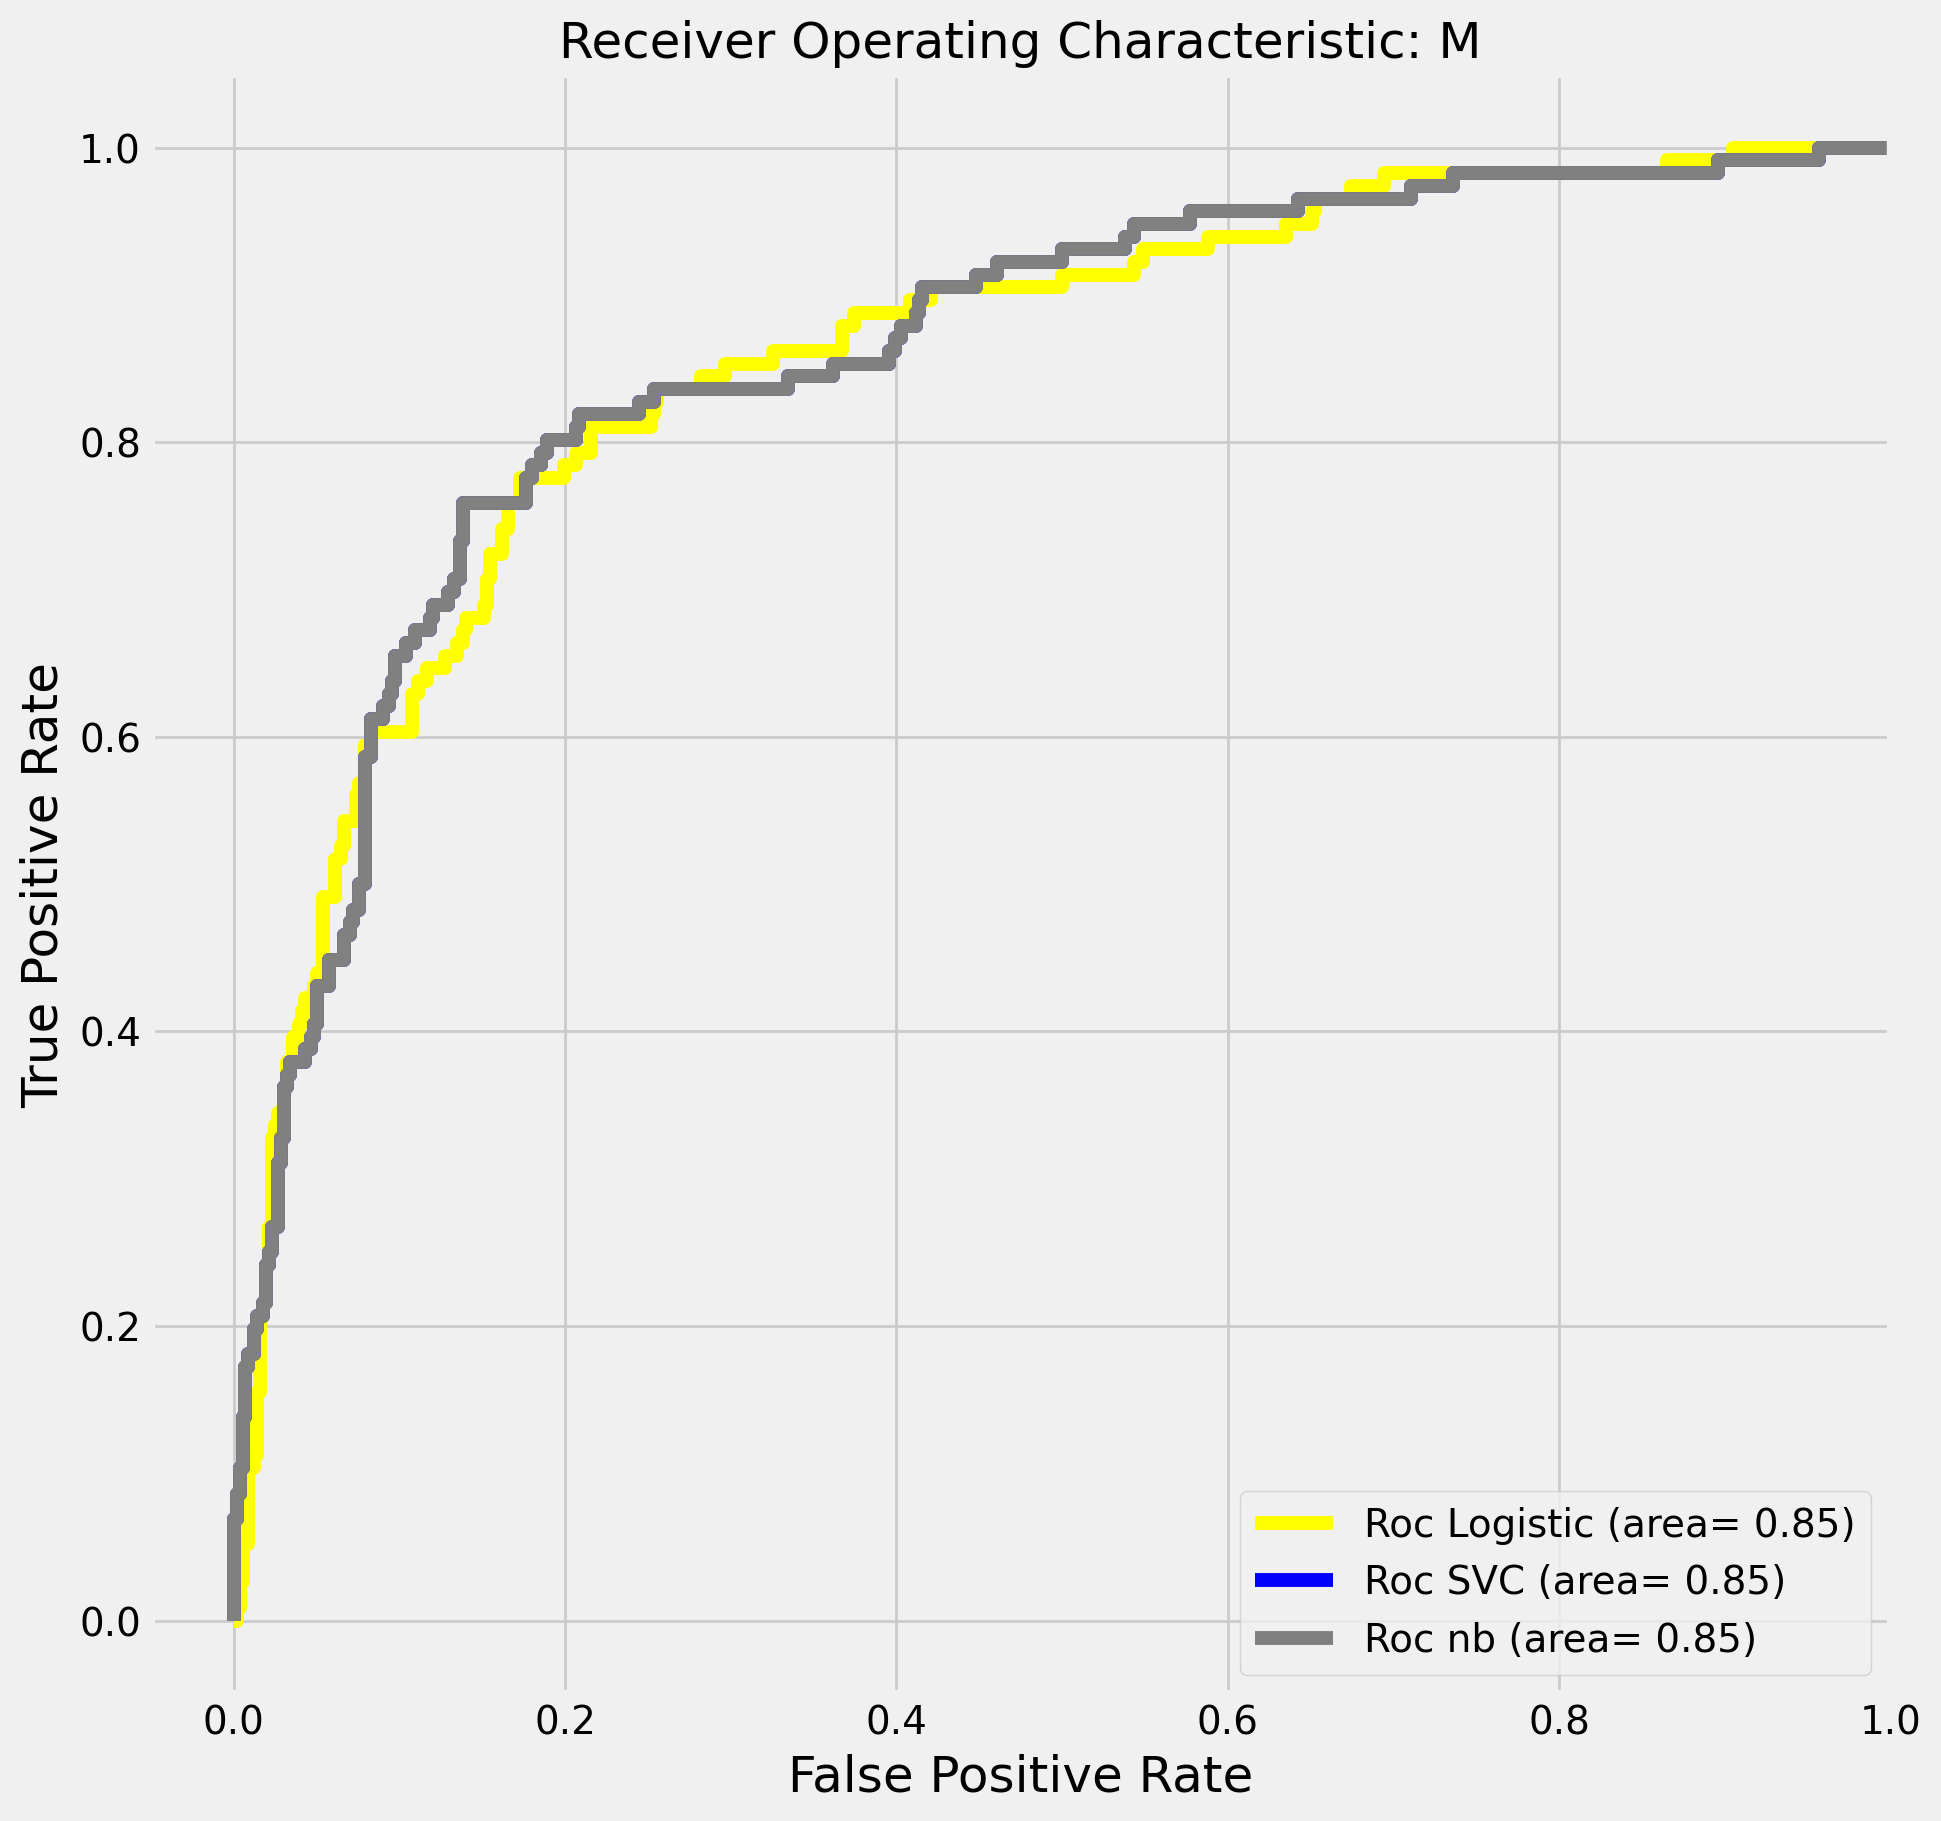

In [29]:
yhat_pp_lin = lin_model.predict_proba(X_test)
yhat_pp = svc_model.predict_proba(X_test)
yhat_pp_nb= model.predict_proba(X_test)
fpr, tpr, _= roc_curve(y_test, yhat_pp_lin[:,1],)
fpr_svc, tpr_svc, _= roc_curve(y_test, yhat_pp[:,1],)
fpr_nb, tpr_nb, _=roc_curve(y_test, yhat_pp[:,1],)




plt.figure(figsize=[10,10])
plt.plot(fpr,tpr, label='Roc Logistic (area= %0.2f)' %auc(fpr,tpr),linewidth= 5, color= 'yellow')
plt.plot(fpr_svc,tpr_svc, label='Roc SVC (area= %0.2f)' %auc(fpr,tpr),linewidth= 5, color= 'blue')
plt.plot(fpr_nb,tpr_nb, label='Roc nb (area= %0.2f)' %auc(fpr,tpr),linewidth= 5, color= 'grey')


plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()